In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
wine = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\wine data.csv')

print (wine.head(10))

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   
5           5     Spain  Blackberry and raspberry aromas show a typical...   
6           6     Italy  Here's a bright, informal red that opens with ...   
7           7    France  This dry and restrained wine offers spice in p...   
8           8   Germany  Savory dried thyme notes accent sunnier flavor...   
9           9    France  This has great depth of flavor with its fresh ...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sar

In [59]:
print(len(wine.groupby(['country'])))

43


In [ ]:
print(wine.nlargest(20,'price'))

In [ ]:
print(wine.describe())

In [ ]:
wine['price'] = wine['price' <= 1000]


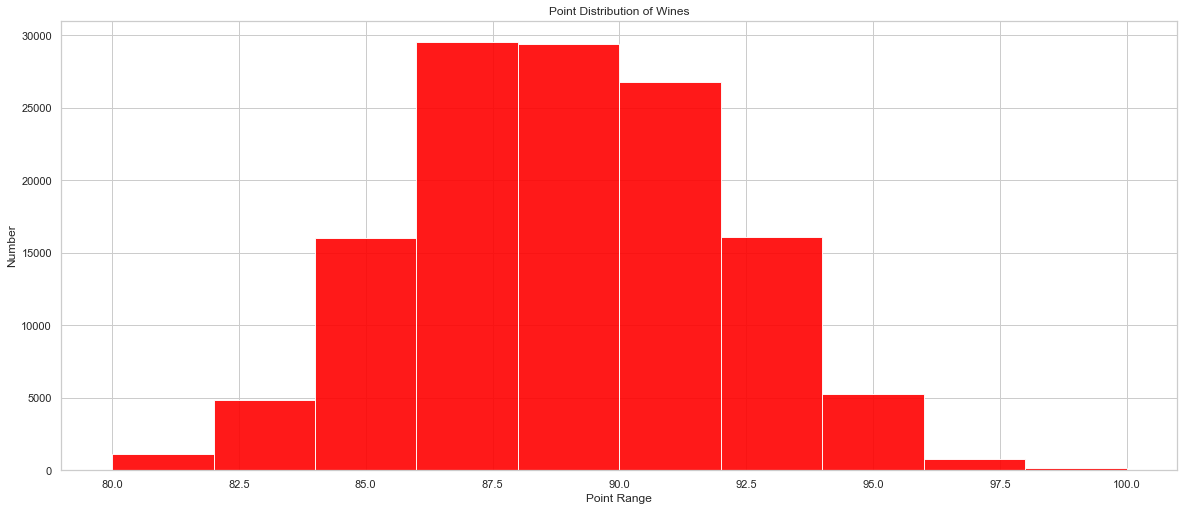

In [84]:
plt.hist(wine['points'], color='red',  alpha=.9, label='Wine Prices') 
plt.title('Point Distribution of Wines')
plt.ylabel('Number')
plt.xlabel('Point Range')
plt.show()
#1
#Graph allows us to see where most wines are falling for points, what is the distribution, and if there are outliers or
#incorrect data (data over 100). Doesn't tell us much else.

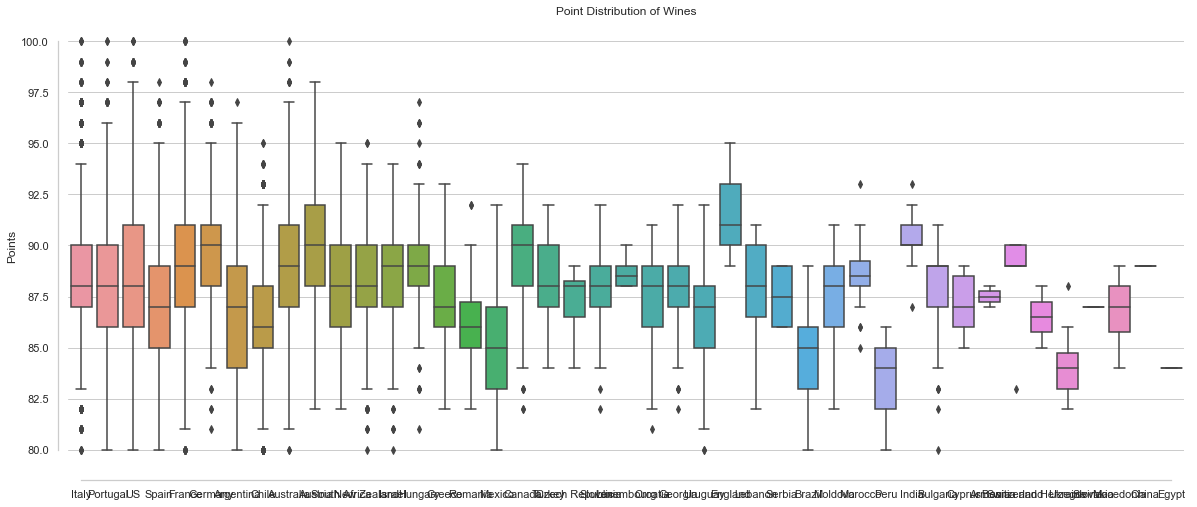

In [89]:
ax = sns.boxplot(x='country',y='points',data=wine)  
plt.title('Point Distribution of Wines')
plt.ylabel('Point Range')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Points')


plt.show()
#3a
#Allows us to see the variability of points per country. Doesn't tell us about size of data for each country.

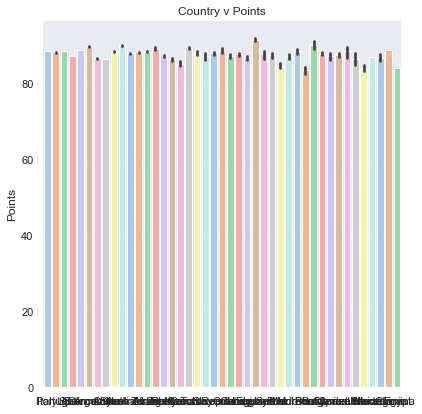

In [94]:
sns.set(style="darkgrid")

g = sns.factorplot(x="country", y="points", data=wine,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Points")
g.set_xlabels("")
plt.title('Country v Points')
plt.show()
#3B Shows that most countries have very close points scores but does not closely show variance like the last chart as it 
#has its y axis beginning at zero. 

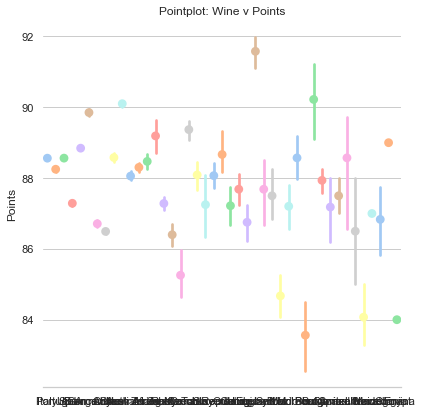

In [76]:
sns.set(style="whitegrid")

g = sns.factorplot(x="country", y="points", data=wine,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Points")
g.set_xlabels("")
plt.title('Pointplot: Wine v Points')
plt.show()
#3c Shows increasing variability of points per country with appropriately adjusted axis. More compact than boxplots but 
#does not show median.

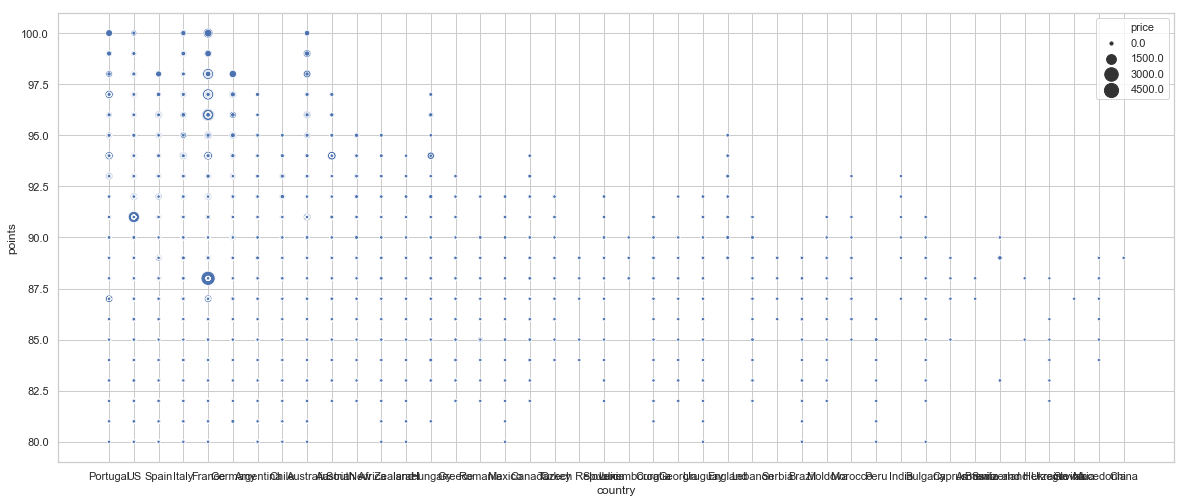

In [77]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="country", y="points",
                     size="price",
                     palette=cmap, sizes=(10, 200),
                     data=wine)
#3d shows three variables, country, points, and price but the price is so skewed by some very expensive wines that the 
#graph loses its usefulness. Would be really cool and helpful with some data filtering.

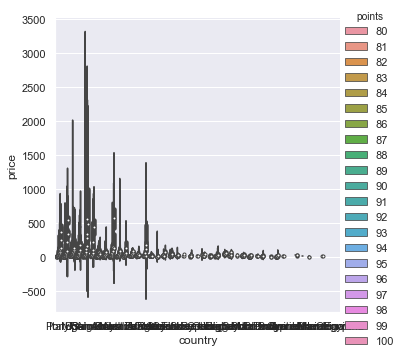

In [95]:
          
sns.catplot(x="country", y="price", hue="points",
            kind="violin", data=wine)
#3e Shows three variables again, but very hard to decipher with all the content involved.

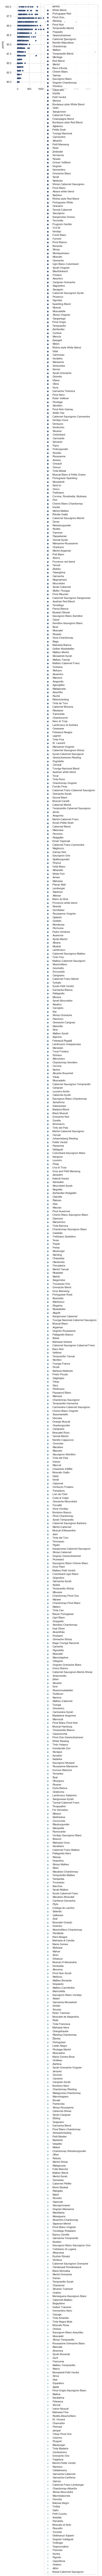

In [67]:
sns.set(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="price", y="points",
                hue="variety",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=wine, ax=ax)
plt.show()
#3f attempts to show price vs points with variety as a third factor but there's too many varieties and not enough
#difference in color scheme.

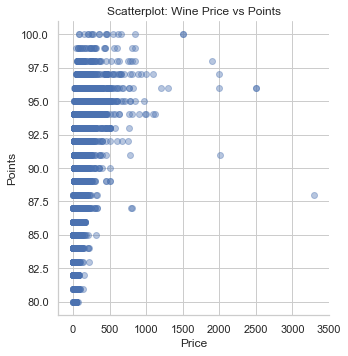

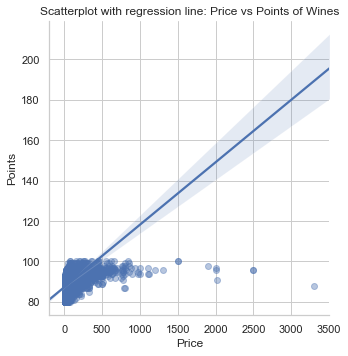

In [68]:
g = sns.lmplot(y='points', # Variable 1.
               x='price', # Variable 2.
               data=wine, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Points")
g.set_xlabels("Price")
plt.title('Scatterplot: Wine Price vs Points')
plt.show()

g = sns.lmplot(y='points', 
               x='price',
               data=wine, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Points")
g.set_xlabels("Price")
plt.title('Scatterplot with regression line: Price vs Points of Wines')
plt.show()

#2a&b continuous variables plotted together: 2a is probably the best graph here as it clearly shows the price range
#changes for wine with point value fluctuation. Filtering expensive wine would show better results
#2b since the points are limited to 100, this graph would be more useful with a limitation to the y axis.

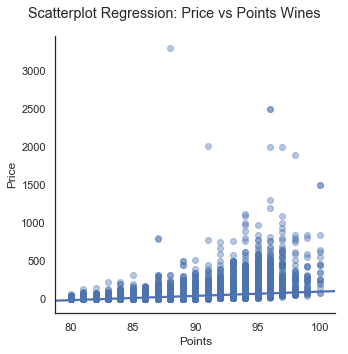

In [70]:
sns.set(style="white")

g = sns.lmplot(y='price', 
               x='points',
               data=wine, # Data.
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Price")
g.set_xlabels("Points")
plt.suptitle('Scatterplot Regression: Price vs Points Wines')
plt.subplots_adjust(top=0.9)
plt.show()
#2c This shows data similar to 2a with a regression line. Again, data filtration would be helpful

In [60]:
wine.groupby(['country']).mean()

,Unnamed: 0,points,price
country,,,
Argentina,65075.723158,86.710263,24.510117
Armenia,37158.000000,87.500000,14.500000
Australia,65037.539287,88.580507,35.437663
Austria,65614.296861,90.101345,30.762772
Bosnia and Herzegovina,56613.000000,86.500000,12.500000
Brazil,54921.634615,84.673077,23.765957
Bulgaria,67618.170213,87.936170,14.645390
Canada,70582.365759,89.369650,35.712598
Chile,64582.882156,86.493515,20.786458


In [61]:
np.mean(wine['price'])

35.363389129985535

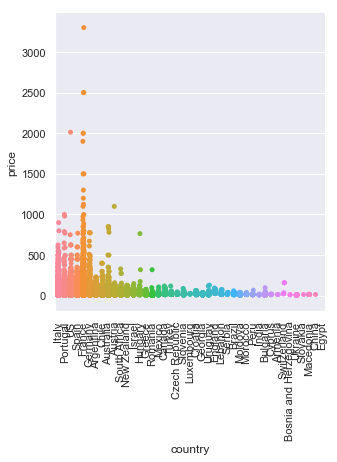

In [62]:
#Choose one variable and plot that variable four different ways.          
g= sns.catplot(x="country", y="price", data=wine)
g = g.set_xticklabels(rotation=90)
g = sns.set(rc={'figure.figsize':(20,8.27)})
plt.show()

In [63]:
##How to group and find mean of one column
y = wine.groupby('country')['price'].mean()
print (y)

country
Argentina                 24.510117
Armenia                   14.500000
Australia                 35.437663
Austria                   30.762772
Bosnia and Herzegovina    12.500000
Brazil                    23.765957
Bulgaria                  14.645390
Canada                    35.712598
Chile                     20.786458
China                     18.000000
Croatia                   25.450704
Cyprus                    16.272727
Czech Republic            24.250000
Egypt                           NaN
England                   51.681159
France                    41.139120
Georgia                   19.321429
Germany                   42.257547
Greece                    22.364425
Hungary                   40.648276
India                     13.333333
Israel                    31.768916
Italy                     39.663770
Lebanon                   30.685714
Luxembourg                23.333333
Macedonia                 15.583333
Mexico                    26.785714
Moldova             

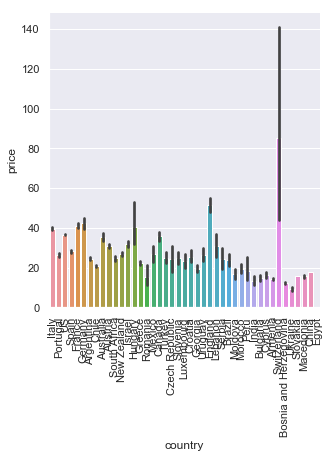

In [18]:
g = sns.catplot(x="country", y="price", kind="bar", data=wine)
g = g.set_xticklabels(rotation=90)

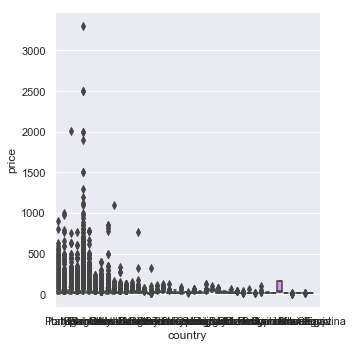

In [24]:
sns.catplot(x="country", y="price", kind="box", data=wine);